In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  6 21:26:45 2018
@author: Fabio
"""

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
import os
import csv
from networkx.algorithms import bipartite

t0=time.time()

def scan(cant,lista):
    i=0
    for x in lista:
        print(x)
        i+=1
        if i>cant:
            break
            
def Tiempo():
    t1=time.time()
    print("Esto tardó {} segundos".format(t1-t0))


def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 
    
Amigos=ldata("Brightkite_edges.txt")
# Ubicacion=ldata("Brightkite_totalCheckins.txt")

#--------------------------------------------------------------------------------------


# Algo que debí definir antes y nunca hice
Maxusu = 0
for x in Amigos:
    Maxusu=max(Maxusu,int(x[0]),int(x[1]))


G = nx.Graph()

G.add_edges_from(Amigos)

Tiempo()
print("Leí los txt")

#--------------------------------------------------------------------------

# os.walk lo que hace es recorrer la carpeta y todas las subcarpetas adentro.
# Root es el path de la carpeta en la que está mirando
# dirs son los nombres de las carpetas dentro de root
# Files son los nombres de todos los archivos dentro de root

# La cosa es que te queda listas dentro de listas. Para cada carpeta que tenga
# Que revisar, va a armar una lista diferente. Así que si le pedís que analice una
# Carpeta con 4 carpetas adentro, te van a quedar en total cinco listas.

# A cada una de estas listas, en la primer coordenada pone el path para entrar a esa carpeta.
# En la segunda coordenada, pone una lista con los nombres de todas las carpetas contenidas
# En la tercer coordenada, pone otra lista con los nombres de todos los archivos contenidos.

CarpCheck=[[root,files] for root,dirs,files in os.walk('Checkins nodo/Checkins Totales/')]

# Como a CarpCheck yo lo hice usando solo root y files, es una lista que se saltea
# Los nombres de las carpetas contenidas


# Nombre de los archivos de Checkins

Labarc= CarpCheck[0][1]


#---------------------------------------------------------------------------

DictID = dict()
DictIDT = dict()
DictLAID = dict()
DictFLAID = dict()

for nombre in Labarc:
    if nombre != "Nodosvacios.csv":
        ListaID = []
        ListaLAID = []
        ListaIDT = []
        ListaFLAID = []
        with open("Checkins nodo/Checkins Totales/{}".format(nombre), newline='') as csvfile:
            # Con el with open abrí mi archivo como csv
            # Con el format voy a recorrer todos los archivos en mi carptea Checkins nodo
            Dat= csv.reader(csvfile, delimiter=',', quotechar='|')
            Data= list(Dat)
            nodo= Data[1][1] # La fila 1 la elegí porque no todos los nodos tienen más de un checkin
            for x in Data[1:]:
                # Me deshago de la isla nula
                if x[5]!="00000000000000000000000000000000":
                    # Le pongo de 1 en adelante porque la primer fila son nombres de columnas
                    if len(x[2])!=0:
                        # Me deshago de los tipos que tienen latitud que no está entre -90 y 90
                        if -90<float(x[3])<90:
                            if x[5] not in ListaID:
                                ListaID.append(x[5])
                                ListaLAID.append([[x[3],x[4]],x[5]])
                            ListaIDT.append(x[5])
                            # Acá armo un Diccionario de fechas
                            dada = x[2].split("T") # Separo en la T, lo de la izquierda es AAAA-MM-DD
                            ListaFLAID.append([dada[0],x[3],x[4],x[5]])
            if len(ListaID)!=0:
                DictIDT[nodo]=ListaIDT
                DictID[nodo]=ListaID
                DictLAID[nodo]=ListaLAID
                DictFLAID[nodo]=ListaFLAID

                

#--------------------------------------------------------------------------------------------

# NCC es Nodos con Check in

NCC=[int(x) for x in DictID.keys()]

# for x in Labarc:
#     if x!="Nodosvacios.csv":
#         linea=x.split(",") # Separo en la coma, porque viene justo despues del nodo
#         name=linea[0].split("n") # Separo en la n porque viene justo antes del nodo
#         # Ahora name es SIEMPRE una lista de 2 elementos. Yo quiero el segundo, que es el nodo
#         node=name[1]
#         NCC.append(node)

        
# # Lo ordeno porque el walk los recorrio por orden alfabético
# # Son strings, los paso a enteros

# for i in range(len(NCC)):
#     NCC[i]=int(NCC[i])    
    
# # Ahora que son enteros los puedo ordenar

NCC.sort()

# Calculemos ahora sí los que están vacíos

NotCC=[]

m= 0

for j in range(Maxusu+1):
    if j!= NCC[j-m]:
        NotCC.append(j)
        m +=1



Tiempo()
print("Armé los diccionarios")
#-------------------------------------------------------------------------
# Corrrer solo una vez

Esto tardó 1.9501116275787354 segundos
Leí los txt
Esto tardó 79.68255758285522 segundos
Armé los diccionarios


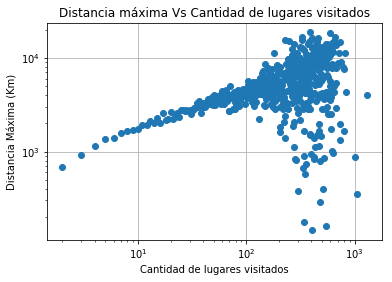

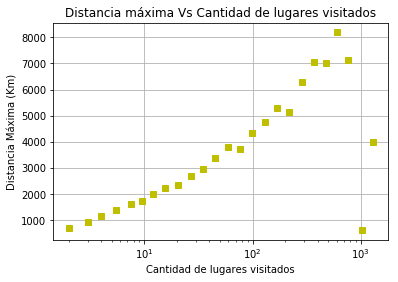

Esto tardó 0.598034143447876 segundos


In [26]:
# Hagamos el gráfico de distancia máxima en función del grado

from geopy.distance import lonlat, distance

t0=time.time()

# LNLAID = [] #Lista con la ubicación más visitada de cada nodo
# for nodo in DictID.keys():
#     Maxim = 0
#     LQV = len(DictID[nodo])
#     if LQV>1:
#         for lugar in DictID[nodo]:
#             weight = DictIDT[nodo].count(lugar)
#             Maxim = max(Maxim,weight)
#             if Maxim==weight:
#                 Lugar=lugar #De esta manera, Lugar es el más visitado de cada nodo
#         for fila in DictLAID[nodo]:
#             if fila[1]==Lugar: #Así me aseguro de tener la data del ID correspondiente
#                 Lat=fila[0][0]
#                 Alt=fila[0][1] #Con esto consigo los datos de latitud y altitud
#                 break
#         LNLAID.append([nodo,float(Lat),float(Alt),Lugar])

# # Ya tengo el lugar más visitado de cada persona. Necesito ahora la distancia máxima de cada persona
# # Ya que puedo, intento calcular la cantidad de lugares visitados, que no es lo mismo que 
# # cantidad de Check-Ins

# Reg=[] #Registro de datos
# for fila in LNLAID:
# #     print("Estoy mirando el nodo:",fila[0])
#     maxd = 0
#     for LAID in DictLAID[fila[0]]:
# #       print("Las coordenadas de Lat y Alt del hogar son:", fila[1],fila[2])
# #       print("Las coordenadas de Lat y Alt a comparar son:", LAID[0][0],LAID[0][1])
#         lugarh = (fila[2],fila[1])
#         lugar2 = (float(LAID[0][1]),float(LAID[0][0]))
#         distancia = distance(lonlat(*lugarh), lonlat(*lugar2)).km
#         maxd = max(distancia,maxd)
#     LQV = len(DictID[fila[0]])
#     Reg.append([maxd,LQV])
        
# DMax = [x[0] for x in Reg]
# LugVis = [x[1] for x in Reg]

# # Ahora, para graficarlo es un tema, porque de seguro la cantidad de LugVis se va repitiendo

# X = []
# Y = []

# for j in range(min(LugVis),max(LugVis)+1):
#     LPro = []
#     for num,dist in zip (LugVis,DMax):
#         if j==num:
#             LPro.append(dist)
#     if len(LPro)!=0:
#         dpro=np.mean(LPro)
#         X.append(j)
#         Y.append(dpro)

Temp2 = []
for j in range(200):
    if 1.3**j>X[len(X)-1]:
        break
    Temp2.append(1.3**j)
Temp2 = set(Temp2)
Temp2 = list(Temp2)
Temp2.sort()
Temp2.append(X[len(X)-1])

X2 = []
Y2 = []
    
for i in range(len(Temp2)-1):
    Index = []
    PrA = []
    PrO = []
    for x in X:
        if Temp2[i]<=x<=Temp2[i+1]:
            m = X.index(x)
            Index.append(m)
            PrA.append(x)
    for tip in Index:
        PrO.append(Y[tip])
    if len(PrA)!=0:
        if len(PrO)!=0:
            x2 = np.mean(PrA)
            y2 = np.mean(PrO)
            X2.append(x2)
            Y2.append(y2)

    

        
plt.loglog(X,Y,"o")
plt.grid()
plt.title("Distancia máxima Vs Cantidad de lugares visitados")
plt.xlabel("Cantidad de lugares visitados")
plt.ylabel("Distancia Máxima (Km)")
plt.show()

plt.semilogx(X2,Y2,"sy")
plt.grid()
plt.title("Distancia máxima Vs Cantidad de lugares visitados")
plt.xlabel("Cantidad de lugares visitados")
plt.ylabel("Distancia Máxima (Km)")
plt.show()
            
            
Tiempo()  

In [27]:
# Bueh, al final terminé separándolo todo de nuevo
t0=time.time()

# Nodos= list(G.nodes())

# Nodos.sort()

Bip=nx.Graph()
Bip.add_nodes_from(NCC, bipartite = 0, color="orange")

# Con eso agregué todos los usuarios a la red, y les asigne bipartite = 0
for nodo in DictID.keys():
    Bip.add_nodes_from(DictID[nodo], bipartite = 1, color="blue")

# Con eso asigné todos los ID's al grafo, con bipartite = 1.
# De paso, que se repitan no es ningún problema, ya lo comprobé

# Ahora viene lo gede
for nodo in DictID.keys():
    Tuplas = []
    for lugar in DictID[nodo]:
        weight = DictIDT[nodo].count(lugar)
        Tuplas.append((int(nodo),lugar,weight))
    Bip.add_weighted_edges_from(Tuplas)
    
Mam = set(n for n,d in Bip.nodes(data=True) if d['bipartite']==0)
Lugares = set(Bip) - Mam

Lugares=list(Lugares)

Mad = bipartite.biadjacency_matrix(Bip,row_order = NCC, column_order = Lugares)

#-------------------------------------------------------------------------------------------

# Cosas por hacer: Comparar similitudes entre matrices. Para esto, hay tres métodos a mirar:
# 1) Comparar los enlaces formados entre la red de amigos y la red proyectada de usuarios
# 2) Clusterizar la red y luego comparar los grupos para una red 
# y para la otra mediante información mutua
# 3) Lo mismo que para el 2 pero con Precisión

#---------------------------------------------------------------------
 

Tiempo()
print("Armé la red bipartita")


Esto tardó 25.544460773468018 segundos
Armé la red bipartita


In [15]:
# Voy a hacer otro análisis de similaridad ahora
# Voy a querer comparar la similitud de dos personas sobre si van a los mismos lugares
# Y cuantas veces fueron en total

t0=time.time()

UI=nx.Graph()

# Mad.getnnz me devuelve un array con la cantidad de elementos no nulos en cada fila o columna
# Para columnas tiene que ser un 0 entre paréntesis, para filas tiene que ser un 1.

# El i y el j son métodos de control para ver que esté laburando correctamente
# El PV es para ver que el tipo haya hecho la primer pasada
# El mem es para ir ajustando los elementos del array columna a recorrer


Filas,Columnas = Mad.nonzero()
unique,counts = np.unique(Filas,return_counts=True)
DRangos = dict(zip(unique, counts))

i=0
fila = 0
inicio = 0
fin = DRangos[0]
Por = np.arange(0,1.1,0.001)
v = 0

for nodo1 in NCC[0:len(NCC)-1]:
    LN = []
    fila += 1
    Conj1 = set(DictID[str(nodo1)])
    ColVis = Columnas[inicio:fin]
    i1 = NCC.index(nodo1)
    for columna in ColVis:
        AN,NI = Mad[:,columna].nonzero() # AN tiene todos los usuarios 
        # que coinciden en lugares con nodo1. AN es Array de Nodos. NI es No interesa
        for x in AN:
            N = NCC[x]
            if N not in LN:
                LN.append(N)
    LN.remove(nodo1)
    for nodo2 in LN:
        i2 = NCC.index(nodo2)
        Conj2 = set(DictID[str(nodo2)])
        INT = 0
        UNI = 0
        # LL es la lista de lugares a recorrer
        LL = Conj1.intersection(Conj2)
        i += 1
        for place in LL:
            lugar = Lugares.index(place)
            inter = min(Mad[i1,lugar],Mad[i2,lugar])
            INT += inter
        LT = Conj1.union(Conj2)
        # LT es la lista de Lugares Totales
        for place in LT:
            uni = max(DictIDT[str(nodo1)].count(place),DictIDT[str(nodo2)].count(place))
            UNI += uni
        Similaridad=INT/UNI
        if Similaridad>0.05:
            UI.add_edge(nodo1,nodo2,Simil = Similaridad)
    inicio += DRangos[fila]
    fin += DRangos[fila]
    fR = nodo1/NCC[len(NCC)-1]
    if fR>Por[v]:
        print("Ya terminé el {} porciento".format(Por[v]*100))
        Tiempo()
        v += 1
    
    
    
    

# Me tardó 390, eso no es tanto

print("i es:",i)
print("i debería ser 1695220878")
print(len(UI.edges()))

# Una vez armado el grafo, empiezo a armarme mi espaciado de similaridades para ver cómo
# Va a variar el procentaje de overlap entre enlaces a medida que vuevlo más estricto el
# Criterio de similaridad
#----------------------------------------------------------------------------------

LEnlaUI = [[tupla[0][0],tupla[0][1],tupla[1]] for tupla in nx.get_edge_attributes(UI,"Simil").items()]

pd.DataFrame(LEnlaUI).to_csv('EnlacesUI.csv')




#------------------------------------------------------------------------------

# PV = False #Esto es para registrar si es el primer elemento del for

# for x in nx.get_edge_attributes(UI,"Simil").values():
#     if PV==False:
#         maxS = x
#         minS = x
#         PV = True
#     maxS = max(maxS,x)
#     minS = min(minS,x)
    
# print(maxS)
# print(minS)

# HAL = UI.copy()

# X = linspace(minS,maxS,10)

# LEnlaG = [[int(x[0]),int(x[1])] for x in G.edges()]
# for i in range(len(LEnlaG)):
#     if LEnlaG[i][0]>=LEnlaG[i][1]:
#             LEnlaG[i]=[LEnlaG[i][1],LEnlaG[i][0]]
# LEnlaG.sort(key=lambda x: x[0])

# for simil in X:
#     for tupla in nx.get_edge_attributes(HAL,"Simil").items():
#         if tupla[1]<simil:
#             HAL.remove_edge(tupla[0][0],tupla[0][1])
#     LEnlaHAL = []
#     LEnlaHAL = [[int(x[0]),int(x[1])] for x in HAL.edges()]
#     # Una vez armada la lista, la ordeno para que quede el usuario 
#     # Con número menor a la izquierda siempre
#     for i in range(len(LEnlaHAL)):
#         if LEnlaHAL[i][0]>=LEnlaHAL[i][1]:
#             LEnlaHAL[i]=[LEnlaHAL[i][1],LEnlaHAL[i][0]]
#     LEnlaHAL.sort(key=lambda x: x[0])
#     Rangos = []
#     # inicio es como el ret en su momento. A cada iteracion me marca
#     # Cuantas filas de cada nodo encontro, y luego empieza justo en la primera del siguiente nodo
#     inicio = 0
#     n=1
#     for nodo in NCC:
#         Rangos.append([inicio,0])
#         for enlace in LEnlaHAL[inicio:inicio+15000]:
#             if enlace[0]!=nodo:
#                 break
#             inicio += 1
#         Rangos[nodo][1] = inicio
# #         if nodo>n*5000:
# #             print("Estoy trabajando amo, ya hice hasta el nodo",nodo)
# #             n += 1
#     print("Arme los rangos")
#     fracen=0
#     Den=len(HAL.edges())
#     for enlace1 in LEnlaG:
#         for enlace2 in LEnlaHAL[Rangos[enlace1[0]][0]:Rangos[enlace1[0]][1]]:
#             if enlace1==enlace2:
#                 fracen += 1/Den
#                 break
#     Tiempo()


    
Tiempo()

Ya terminé el 0.0 porciento
Esto tardó 619.5104341506958 segundos


KeyboardInterrupt: 

In [16]:
import os

t0=time.time()

#---------------------------------------------------------------------------------------------------
#Esto lo hice para probar como era la cosa de agregar enlaces, y agregarles atributos a un grafo

# PR=nx.Graph()

# PR.add_edge("a","b",atrib = "Fred")
# PR.add_edge("c","b",atrib = "Fred")
# PR.add_edge("d","b",atrib = "Fred")
# PR.add_edge("e","b",atrib = "Fred")
# PR.add_edge("a","c",atrib = "Ddie")
# PR.add_edge("a","e",atrib = "Ddie")
# PR.add_edge("c","e",atrib = "Merc")
# PR.add_edge("d","f",atrib = "Ury")

# nx.draw(PR,with_labels=True)
# plt.show()

# print(PR.edges("a"))

# A = nx.get_edge_attributes(PR,"atrib")

# scan(5,A.values())

#---------------------------------------------------------------------------------------------------

# from geopy.distance import lonlat, distance
# newport_ri_xy = (-71.312796, 41.49008)
# cleveland_oh_xy = (-81.695391, 41.499498)
# print(distance(lonlat(*newport_ri_xy), lonlat(*cleveland_oh_xy)).miles)

#---------------------------------------------------------------------------------------------------

# with open("Checkins nodo/{}".format(Labarc[0]), newline='') as csvfile:
#     # Con el with open abrí mi archivo como csv
#     # Con el format voy a recorrer todos los archivos en mi carptea Checkins nodo
#     Dat= csv.reader(csvfile, delimiter=',', quotechar='|')
#     Data= list(Dat)
#     # Acá armo un Diccionario de fechas
# #     for x in Data[2:6]:
# #         dada = x[2].split("T") # Separo en la T, lo de la izquierda es AAAA-MM-DD
# #         fechas = dada[0].split("-") # fechas[0]=AAAA, fechas[1]=MM, fechas[2]==DD
# #         print(fechas)

#---------------------------------------------------------------------------------------------------

print(nodo1)
print(len(UI.edges()))

Tiempo()

12
200
Esto tardó 0.0030002593994140625 segundos


In [29]:
# Esta es la parte del análisis de similitud, en verdad no lo necesito más, por ahora

t0=time.time()

# Armemos el grafo proyectado
# Correr esto puede llegar a ser pesado, asegurate de hacerlo primero. O de guardar los archivos
# EnlaG y EnlaP

Proyec = bipartite.projected_graph(Bip,NCC)

# Ahora que tengo esto, tengo que empezar a plantearme como comparar los enlaces

EnlaG = G.edges()

print(len(Proyec.edges()))
# EnlaP = Proyec.edges()

# Hacer las listas no tardó tanto, 4 segundos

# LEnlaG = [[int(x[0]),int(x[1])] for x in EnlaG]
# LEnlaP = [[int(x[0]),int(x[1])] for x in EnlaP]

# for i in range(len(LEnlaP)):
#     if i < len(LEnlaG):
#         if LEnlaG[i][0]>=LEnlaG[i][1]:
#             LEnlaG[i]=[LEnlaG[i][1],LEnlaG[i][0]]
#     if LEnlaP[i][0]>=LEnlaP[i][1]:
#         LEnlaP[i]=[LEnlaP[i][1],LEnlaP[i][0]]
        
# LEnlaG.sort(key=lambda x: x[0])
# LEnlaP.sort(key=lambda x: x[0])

# # GradoP = Proyec.degree()

# # gradmax=0

# # for x in GradoP:
# #     gradmax=max(gradmax,x[1])
    
# # Para no hacer la cuenta de nuevo, el grado máximo en la red proyectada es 11645

# Rangos = []
# # inicio es como el ret en su momento. A cada iteracion me marca
# # Cuantas filas de cada nodo encontro, y luego empieza justo en la primera del siguiente nodo
# inicio = 0
# n=1
# for nodo in range(Maxusu+1):
#     Rangos.append([inicio,0])
#     for enlace in LEnlaP[inicio:inicio+15000]:
#         if enlace[0]!=nodo:
#             break
#         inicio += 1
#     Rangos[nodo][1] = inicio
#     if nodo==n*1000:
#         #print("Estoy trabajando amo, ya hice hasta el nodo",nodo)
#         n += 1

# # Ya tengo los rangos calculados, ahora si puedo hacer el estudio de los enlaces

# fracen=0
# Den=len(G.edges())

# for enlace1 in LEnlaG:
#     for enlace2 in LEnlaP[Rangos[enlace1[0]][0]:Rangos[enlace1[0]][1]]:
#         if enlace1==enlace2:
#             fracen += 1/Den
#             break
            
# print("La fracción de enlaces que se repiten en ambos grafos es:",fracen)

# # El fracen me dió 0.27579. Así te ahorrás la cuenta

# # ¿Cuál es el porcentaje de los enlaces que no tienen checkin?

# fracnot=0

# for x in LEnlaG:
#     if x[0] in NotCC:
#         fracnot += 1/Den
#     else:
#         if x[1] in NotCC:
#             fracnot += 1/Den

# print("La fracción de enlaces en la red original cuyos usuarios no tienen checkins es:",fracnot)
# # Me dio 0,0789, así te ahorrás la cuenta   

Tiempo()

7635164
Esto tardó 48.46677207946777 segundos


In [62]:
#Pruebas

A=[0,1,2,3,4,5,6,7]

print(A[2:4])


# Celda con cosas de ayudas
       
# Para acceder a un elemento, o filas, basta con ponerlo entre corchetes

# Ya que use las listas Nodos y Lugares para organizar las filas y columnas,
# Mad debería tener una cantidad de filas = len(Nodos) y cantidad de columnas = len(Lugares)

# Fijate al final del error, podés ver el largo de la matriz. Que lindo

# print(len(Nodos))
# print(len(Lugares))
# print(Mad[60000,12])

# Este tipo sirve para conocer el largo y el ancho de Mad. Con el 1, me dice la cantidad de filas
# Con el 0, me dice la cantidad de columnas
print(len(Mad.getnnz(1)))

#------------------------------------------------------------------------
# ¿Cuantos tipos de alto grado no tienen Checkins?

# n=0
# for x in NotCC:
#     if DictGrado[str(x)]>=100:
#         n +=1
# print("Hay {} nodos de grado mayor a 100 sin Check-ins".format(n))

# m=0
# for x in DictGrado.values():
#     if x>=100:
#         m +=1
# print("Hay {} nodos de grado mayor a 100".format(m))

# print("La fracción de nodos sin Check-ins de alto grado es:",n/m)

#----------------------------------------------------------------------------

# Ejemplo de como armar un grafo bipartito. Usalo para jugar cuando no entiendas que
# cosa no funciona

# A = [1,2,3,4,5,6]
# B = ["a","b","c","d"]

# Pip = nx.Graph()
# Pip.add_nodes_from(A, bipartite = 0)
# Pip.add_nodes_from(B, bipartite = 1)
# Pip.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(2,"a"),(2,"c")])
# Pip.add_edges_from([(2,"d"),(3,"a"),(3,"b"),(4,"c"),(4,"d"),(5,"b"),(6,"d")], weight = 4)

# bottom_nodes, top_nodes = bipartite.sets(Pip)

# print("Los top son:")
# print(top_nodes)
# print("Los bottom son:")
# print(bottom_nodes)

# M = bipartite.biadjacency_matrix(Pip,row_order = A,column_order = B)


# R = bipartite.projected_graph(Pip, top_nodes)

# nx.draw(R,with_labels=True)
# plt.show()

#---------------------------------------------------------------------------

[2, 3]
50687


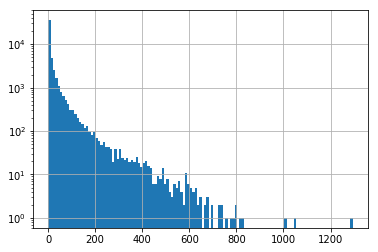

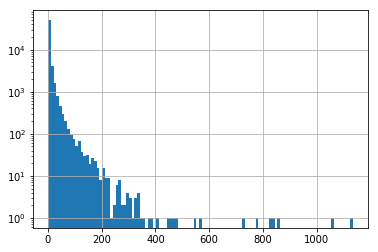

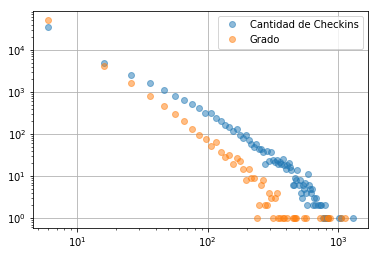

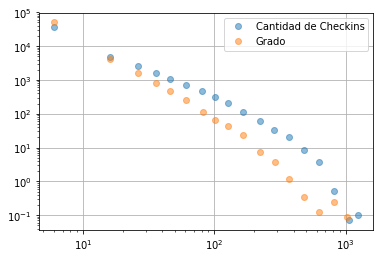

Esto tardó 1810.9395797252655 segundos


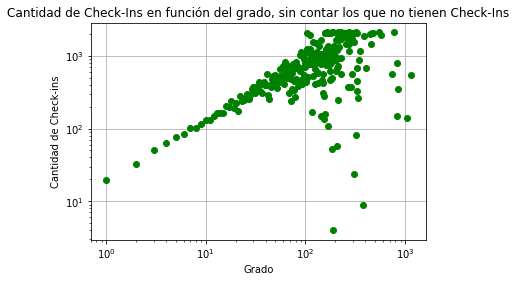

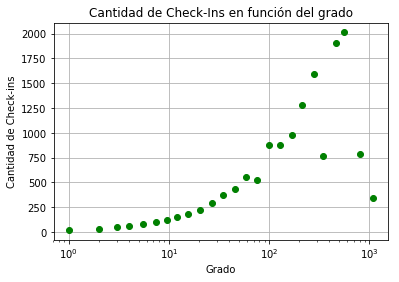

In [23]:
# Voy a juntar acá a los histogramas

# Distribuciòn de cantidad de localidades distintas visitadas

import math
from scipy import optimize

Histo=[]

for x in DictID.values():
    Histo.append(len(x))

Bin=math.floor(max(Histo)/10)

Num,bines,patches=plt.hist(Histo,bins=Bin,log=True)
plt.grid()
plt.show()

bin_med = 0.5* (bines[0:len(bines)-1]+bines[1:len(bines)])



#-----------------------------------------------------------------
# Ahora hagamos distribuciòn de grado

Grado=[]

for x in G.degree():
    Grado.append(x[1])

A= np.mean(Grado)

Bin=math.floor(max(Grado)/10)

Num2,bines2,patches = plt.hist(Grado,bins=Bin,log=True)
plt.grid()
plt.show()

bin_med2 = 0.5* (bines2[0:len(bines2)-1]+bines2[1:len(bines2)])

plt.figure()
plt.loglog(bin_med,Num,"o",alpha=0.5,label = "Cantidad de Checkins")
plt.loglog(bin_med2,Num2,"o",alpha=0.5,label = "Grado")
plt.legend()
plt.grid()
plt.show()


Temp2 = []
bin_med = list(bin_med)
for j in range(200):
    if 1.3**j>bin_med[len(bin_med)-1]:
        break
    Temp2.append(1.3**j)
Temp2 = set(Temp2)
Temp2 = list(Temp2)
Temp2.sort()
Temp2.append(bin_med[len(bin_med)-1])

X2 = []
Y2 = []
    
for i in range(len(Temp2)-1):
    Index = []
    PrA = []
    PrO = []
    for x in bin_med:
        if Temp2[i]<=x<=Temp2[i+1]:
            m = bin_med.index(x)
            Index.append(m)
            PrA.append(x)
    for tip in Index:
        PrO.append(Num[tip])
    if len(PrA)!=0:
        if len(PrO)!=0:
            x2 = np.mean(PrA)
            y2 = np.mean(PrO)
            X2.append(x2)
            Y2.append(y2)

# fitfunc = lambda p, x: p[0]*x+p[1]# Funcion con la que queremos fitear la data
# p0 = [1, 1] # Parametros iniciales para fitear

# errfunc = lambda p, x, y: fitfunc(p, x) - y # Distancia a la función objetivo
# p1, success = optimize.leastsq(errfunc, p0[:], args=(X2[2:12], Y2[2:12]))

# print("A la cantidad de checkins le corresponde una potencia de:",p1[1])
# plt.plot(X2[2:12],fitfunc(p1,X2[2:12]),label = "Ajuste a los Checkins")

plt.loglog(X2,Y2,"o",alpha=0.5,label = "Cantidad de Checkins")
plt.grid()
            


Temp2 = []
bin_med2 = list(bin_med2)
for j in range(200):
    if 1.3**j>bin_med2[len(bin_med2)-1]:
        break
    Temp2.append(1.3**j)
Temp2 = set(Temp2)
Temp2 = list(Temp2)
Temp2.sort()
Temp2.append(bin_med2[len(bin_med2)-1])

X2 = []
Y2 = []
    
for i in range(len(Temp2)-1):
    Index = []
    PrA = []
    PrO = []
    for x in bin_med2:
        if Temp2[i]<=x<=Temp2[i+1]:
            m = bin_med2.index(x)
            Index.append(m)
            PrA.append(x)
    for tip in Index:
        PrO.append(Num2[tip])
    if len(PrA)!=0:
        if len(PrO)!=0:
            x2 = np.mean(PrA)
            y2 = np.mean(PrO)
            X2.append(x2)
            Y2.append(y2)
            

            
# errfunc = lambda p, x, y: fitfunc(p, x) - y # Distancia a la función objetivo
# p1, success = optimize.leastsq(errfunc, p0[:], args=(X2[2:12], Y2[2:12]))

# print("A los grados les corresponde una potencia de:",p1[1])

# plt.plot(X2[2:12],fitfunc(p1,X2[2:12]), label = "Ajuste a los Grados")
plt.loglog(X2,Y2,"o",alpha=0.5,label = "Grado")
plt.legend()
plt.show() 
#-----------------------------------------------------------------------

# # Debería hacer una relación entre distribución de grado Cantidad de ID's visitados

# t0=time.time()

# # Me armo un diccionario de grado para cada nodo
# DictGrado = dict()

# Gradmax=0

# for x in G.degree():
#     DictGrado[x[0]]=x[1]
#     Gradmax=max(Gradmax,x[1])

# Lgrados= list(set(Grado))
# Lgrados.sort()

# X=[]
# Y=[]

# # Este método tarda mucho, busquemos otra forma de armar el gráfico
# # for grad in Lgrados:
# #     LPromed = []
# #     for pareja in DictGrado.items():
# #         if pareja[0] in NCC and pareja[1]==grad:
# #             LPromed.append(len(DictID[pareja[0]]))
# #         if pareja[0] not in NCC and pareja[1]==grad:
# #             LPromed.append(0)
# #     Promed=np.mean(LPromed)
# #     X.append(grad)
# #     Y.append(Promed)
    
    
# #--------------------------------------------------------

# # GradID = []

# # for nodo in NCC:
# #     GradID.append([nodo,DictGrad[nodo],len(DictID[nodo])])

# # # Ya me armé la lista de grado e ID, la sorteo según grado
# # GradID.sort(key=lambda x:x[1])

# #--------------------------------------------------------------

# DictGID = dict()
# # DictGID es un diccionario que a cada grado le va a asignar una lista con 
# # la cantidad de ID's distintos visitados por cada usuario.
# # Pero no guarda registro de cuales nodos son los que tenían ese grado o ese ID

# for grad in Lgrados:
#     DictGID[grad]=[]

# for tupla in G.degree():
#     if int(tupla[0]) in NCC:
#         DictGID[tupla[1]].append(len(DictID[tupla[0]]))
#     if int(tupla[0]) in NotCC:
#         DictGID[tupla[1]].append(0)

# # Lo siguiente me arma mis listas X e Y con los valores a plotear, asignándolos de manera
# # Correspondiente a los valores en X e Y. Espero que el hecho de que no estén ordenados no
# # sea un problema
        
# for pareja in DictGID.items():
#     x=pareja[0]
#     y=np.mean(pareja[1])
#     X.append(x)
#     Y.append(y)




# Tiempo()

   
# # plt.plot(X,Y)
# # plt.grid()
# # plt.xlabel("Grado")
# # plt.ylabel("Cantidad de ID's distintas")
# # plt.title("Cantidad de ID's en función del grado")
# # plt.show()

# #---------------------------------------------------------

# # Ahora hagámoslo sin contar los tipos con 0 Checkins

# for grad in Lgrados:
#     DictGID[grad]=[]

# for tupla in G.degree():
#     if int(tupla[0]) in NCC:
#         DictGID[tupla[1]].append(len(DictID[tupla[0]]))


# # Lo siguiente me arma mis listas X e Y con los valores a plotear, asignándolos de manera
# # Correspondiente a los valores en X e Y. Espero que el hecho de que no estén ordenados no
# # sea un problema

# X=[]
# Y=[]
        
# for pareja in DictGID.items():
#     if len(pareja[1])!=0:
#         x=pareja[0]
#         y=np.mean(pareja[1])
#         X.append(x)
#         Y.append(y)

# Tiempo()        

# plt.loglog(X,Y,"r")
# plt.grid()
# plt.xlabel("Grado")
# plt.ylabel("Cantidad de ID's distintas")
# plt.title("Cantidad de ID's en función del grado, sin contar los que no tienen Check-Ins")
# plt.show()

# #--------------------------------------------------------------------

# # Por último, hagámoslo para el largo total de los ID's

# for grad in Lgrados:
#     DictGID[grad]=[]

# for tupla in G.degree():
#     if int(tupla[0]) in NCC:
#         DictGID[tupla[1]].append(len(DictIDT[tupla[0]]))
#     if int(tupla[0]) in NotCC:
#         DictGID[tupla[1]].append(0)


# # Lo siguiente me arma mis listas X e Y con los valores a plotear, asignándolos de manera
# # Correspondiente a los valores en X e Y. Espero que el hecho de que no estén ordenados no
# # sea un problema

# X=[]
# Y=[]
        
# for pareja in DictGID.items():
#     x=pareja[0]
#     y=np.mean(pareja[1])
#     X.append(x)
#     Y.append(y)

        
# Tiempo()
        
# # plt.loglog(X,Y,"orange")
# # plt.grid()
# # plt.xlabel("Grado")
# # plt.ylabel("Cantidad de Check-ins")
# # plt.title("Cantidad de Check-Ins en función del grado")
# # plt.show()

# #---------------------------------------------------------------

# # Por último último, hagámoslo sin contar los vacíos de check-ins
# # Para cantidad total de Check-ins

# for grad in Lgrados:
#     DictGID[grad]=[]

# for tupla in G.degree():
#     if int(tupla[0]) in NCC:
#         DictGID[tupla[1]].append(len(DictIDT[tupla[0]]))


# # Lo siguiente me arma mis listas X e Y con los valores a plotear, asignándolos de manera
# # Correspondiente a los valores en X e Y. Espero que el hecho de que no estén ordenados no
# # sea un problema

# X=[]
# Y=[]
        
# for pareja in DictGID.items():
#     if len(pareja[1])!=0:
#         x=pareja[0]
#         y=np.mean(pareja[1])
#         X.append(x)
#         Y.append(y)
        

Temp2 = []
for j in range(200):
    if 1.3**j>X[len(X)-1]:
        break
    Temp2.append(1.3**j)
Temp2 = set(Temp2)
Temp2 = list(Temp2)
Temp2.sort()
Temp2.append(X[len(X)-1])

X2 = []
Y2 = []
    
for i in range(len(Temp2)-1):
    Index = []
    PrA = []
    PrO = []
    for x in X:
        if Temp2[i]<=x<=Temp2[i+1]:
            m = X.index(x)
            Index.append(m)
            PrA.append(x)
    for tip in Index:
        PrO.append(Y[tip])
    if len(PrA)!=0:
        if len(PrO)!=0:
            x2 = np.mean(PrA)
            y2 = np.mean(PrO)
            X2.append(x2)
            Y2.append(y2)


Tiempo()        

plt.loglog(X,Y,"og")
plt.grid()
plt.xlabel("Grado")
plt.ylabel("Cantidad de Check-ins")
plt.title("Cantidad de Check-Ins en función del grado, sin contar los que no tienen Check-Ins")
plt.show()

plt.semilogx(X2,Y2,"og")
plt.grid()
plt.title("Cantidad de Check-Ins en función del grado")
plt.xlabel("Grado")
plt.ylabel("Cantidad de Check-ins")
plt.show()



In [21]:
# Defino la similitud entre dos usuarios como el valor normalizado entre 0 y 1
# Que resulta de contar la cantidad de lugares comunes que visitan y al número ese 
# Dividirlo por el máximo de la cantidad de lugares que visitan cada uno

# Primero voy a analizar similitud entre amigos.

p2=[3.5,2]
Mam = np.arange(15)

print(fitfunc(p2,Mam))


# t0=time.time()

# i=0

# MatSimil = []

# for nodo1 in DictID.keys():
#     Vecinos = G[nodo1] # Esto es un dict con todos los amigos del nodo1
#     FilaSimil =[]
#     for nodo2 in Vecinos:
#         if int(nodo2) in NCC:
#             Conj1 = set(DictID[nodo1])
#             Conj2 = set(DictID[nodo2])
#             Conj3 = Conj1.intersection(Conj2)
#             ValSimil = len(Conj3)
#             FilaSimil.append(ValSimil)
# #             print(nodo1)
# #             print(FilaSimil)
#     MatSimil.append(FilaSimil)
    



# t1=time.time()
# print("Tardaste {} segundos".format(t1-t0))


[ 2.   5.5  9.  12.5 16.  19.5 23.  26.5 30.  33.5 37.  40.5 44.  47.5
 51. ]


In [6]:
# Por ahora a esto no lo voy a volver a usar
import csv
import pandas as pd
import numpy as np
import time

t0 = time.time()

def scan(cant,lista):
    i=0
    for x in lista:
        print(x)
        i+=1
        if i>cant:
            break
            

            
def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 



            
Amigos=ldata("edges_3meses.txt")

# Algo que debí definir antes y nunca hice

Maxusu= int(Amigos[len(Amigos)-1][0])


with open("checkins_filtrados_3meses.csv", newline='') as csvfile:
    # Con el with open abrí mi archivo como csv
    # Con el format voy a recorrer todos los archivos en mi carptea Checkins nodo
    Dat= csv.reader(csvfile, delimiter=',', quotechar='|')
    Ubicacion= list(Dat)
    Cat=["FilaO","Nodo","Fecha","Latitud","Altitud","Id de Locación"]
    Vacio=[]
    # Inicio=input("¿Desde que usuario queres empezar?: ")
    # Fin=input("¿Hasta que nodo llegamos?: ")
    # ret=int(input("¿Desde que fila empiezo?(Acordate de usar el ultimo lac):  "))
    #V = [0]
    ret=1
    for j in range(Maxusu+1):
        Data=[]
        print("Estoy trabajando en el usuario {}".format(j))
        for x in Ubicacion[ret:ret+10000]:
            if int(x[1])!=j:
                break
            Data.append(x)
        if len(Data)!=0:
            ret +=len(Data)
            pd.DataFrame(Data).to_csv('Checkins 3meses/Checkin{},lac{}.csv'.format(j,ret),header=Cat)
            print("Ya armé la lista de check ins del usuario {}".format(j))
        if len(Data)==0:
#             print("El usuario {} no tiene check ins".format(j))
            Vacio.append(j)
    t1 = time.time()
    print("Tardaste este tiempo {}".format(t1-t0))


Estoy trabajando en el usuario 0
Estoy trabajando en el usuario 1
Estoy trabajando en el usuario 2
Ya armé la lista de check ins del usuario 2
Estoy trabajando en el usuario 3
Ya armé la lista de check ins del usuario 3
Estoy trabajando en el usuario 4
Estoy trabajando en el usuario 5
Ya armé la lista de check ins del usuario 5
Estoy trabajando en el usuario 6
Ya armé la lista de check ins del usuario 6
Estoy trabajando en el usuario 7
Ya armé la lista de check ins del usuario 7
Estoy trabajando en el usuario 8
Estoy trabajando en el usuario 9
Estoy trabajando en el usuario 10
Ya armé la lista de check ins del usuario 10
Estoy trabajando en el usuario 11
Estoy trabajando en el usuario 12
Ya armé la lista de check ins del usuario 12
Estoy trabajando en el usuario 13
Ya armé la lista de check ins del usuario 13
Estoy trabajando en el usuario 14
Estoy trabajando en el usuario 15
Estoy trabajando en el usuario 16
Estoy trabajando en el usuario 17
Ya armé la lista de check ins del usuario 1

Ya armé la lista de check ins del usuario 223
Estoy trabajando en el usuario 224
Estoy trabajando en el usuario 225
Estoy trabajando en el usuario 226
Estoy trabajando en el usuario 227
Estoy trabajando en el usuario 228
Estoy trabajando en el usuario 229
Ya armé la lista de check ins del usuario 229
Estoy trabajando en el usuario 230
Estoy trabajando en el usuario 231
Estoy trabajando en el usuario 232
Estoy trabajando en el usuario 233
Estoy trabajando en el usuario 234
Ya armé la lista de check ins del usuario 234
Estoy trabajando en el usuario 235
Estoy trabajando en el usuario 236
Estoy trabajando en el usuario 237
Estoy trabajando en el usuario 238
Ya armé la lista de check ins del usuario 238
Estoy trabajando en el usuario 239
Ya armé la lista de check ins del usuario 239
Estoy trabajando en el usuario 240
Ya armé la lista de check ins del usuario 240
Estoy trabajando en el usuario 241
Estoy trabajando en el usuario 242
Estoy trabajando en el usuario 243
Ya armé la lista de chec

Ya armé la lista de check ins del usuario 415
Estoy trabajando en el usuario 416
Estoy trabajando en el usuario 417
Ya armé la lista de check ins del usuario 417
Estoy trabajando en el usuario 418
Ya armé la lista de check ins del usuario 418
Estoy trabajando en el usuario 419
Ya armé la lista de check ins del usuario 419
Estoy trabajando en el usuario 420
Estoy trabajando en el usuario 421
Estoy trabajando en el usuario 422
Estoy trabajando en el usuario 423
Estoy trabajando en el usuario 424
Estoy trabajando en el usuario 425
Estoy trabajando en el usuario 426
Estoy trabajando en el usuario 427
Ya armé la lista de check ins del usuario 427
Estoy trabajando en el usuario 428
Ya armé la lista de check ins del usuario 428
Estoy trabajando en el usuario 429
Ya armé la lista de check ins del usuario 429
Estoy trabajando en el usuario 430
Estoy trabajando en el usuario 431
Ya armé la lista de check ins del usuario 431
Estoy trabajando en el usuario 432
Estoy trabajando en el usuario 433
Ya

Estoy trabajando en el usuario 603
Ya armé la lista de check ins del usuario 603
Estoy trabajando en el usuario 604
Estoy trabajando en el usuario 605
Ya armé la lista de check ins del usuario 605
Estoy trabajando en el usuario 606
Ya armé la lista de check ins del usuario 606
Estoy trabajando en el usuario 607
Ya armé la lista de check ins del usuario 607
Estoy trabajando en el usuario 608
Estoy trabajando en el usuario 609
Estoy trabajando en el usuario 610
Ya armé la lista de check ins del usuario 610
Estoy trabajando en el usuario 611
Estoy trabajando en el usuario 612
Ya armé la lista de check ins del usuario 612
Estoy trabajando en el usuario 613
Ya armé la lista de check ins del usuario 613
Estoy trabajando en el usuario 614
Ya armé la lista de check ins del usuario 614
Estoy trabajando en el usuario 615
Estoy trabajando en el usuario 616
Estoy trabajando en el usuario 617
Ya armé la lista de check ins del usuario 617
Estoy trabajando en el usuario 618
Ya armé la lista de check 

Ya armé la lista de check ins del usuario 834
Estoy trabajando en el usuario 835
Estoy trabajando en el usuario 836
Ya armé la lista de check ins del usuario 836
Estoy trabajando en el usuario 837
Estoy trabajando en el usuario 838
Estoy trabajando en el usuario 839
Estoy trabajando en el usuario 840
Estoy trabajando en el usuario 841
Estoy trabajando en el usuario 842
Estoy trabajando en el usuario 843
Estoy trabajando en el usuario 844
Estoy trabajando en el usuario 845
Estoy trabajando en el usuario 846
Ya armé la lista de check ins del usuario 846
Estoy trabajando en el usuario 847
Ya armé la lista de check ins del usuario 847
Estoy trabajando en el usuario 848
Estoy trabajando en el usuario 849
Estoy trabajando en el usuario 850
Estoy trabajando en el usuario 851
Estoy trabajando en el usuario 852
Estoy trabajando en el usuario 853
Estoy trabajando en el usuario 854
Estoy trabajando en el usuario 855
Estoy trabajando en el usuario 856
Estoy trabajando en el usuario 857
Estoy traba

Ya armé la lista de check ins del usuario 1051
Estoy trabajando en el usuario 1052
Estoy trabajando en el usuario 1053
Estoy trabajando en el usuario 1054
Estoy trabajando en el usuario 1055
Ya armé la lista de check ins del usuario 1055
Estoy trabajando en el usuario 1056
Ya armé la lista de check ins del usuario 1056
Estoy trabajando en el usuario 1057
Estoy trabajando en el usuario 1058
Estoy trabajando en el usuario 1059
Ya armé la lista de check ins del usuario 1059
Estoy trabajando en el usuario 1060
Ya armé la lista de check ins del usuario 1060
Estoy trabajando en el usuario 1061
Ya armé la lista de check ins del usuario 1061
Estoy trabajando en el usuario 1062
Ya armé la lista de check ins del usuario 1062
Estoy trabajando en el usuario 1063
Estoy trabajando en el usuario 1064
Ya armé la lista de check ins del usuario 1064
Estoy trabajando en el usuario 1065
Ya armé la lista de check ins del usuario 1065
Estoy trabajando en el usuario 1066
Estoy trabajando en el usuario 1067
E

Ya armé la lista de check ins del usuario 1300
Estoy trabajando en el usuario 1301
Estoy trabajando en el usuario 1302
Estoy trabajando en el usuario 1303
Estoy trabajando en el usuario 1304
Ya armé la lista de check ins del usuario 1304
Estoy trabajando en el usuario 1305
Ya armé la lista de check ins del usuario 1305
Estoy trabajando en el usuario 1306
Estoy trabajando en el usuario 1307
Ya armé la lista de check ins del usuario 1307
Estoy trabajando en el usuario 1308
Ya armé la lista de check ins del usuario 1308
Estoy trabajando en el usuario 1309
Ya armé la lista de check ins del usuario 1309
Estoy trabajando en el usuario 1310
Estoy trabajando en el usuario 1311
Estoy trabajando en el usuario 1312
Ya armé la lista de check ins del usuario 1312
Estoy trabajando en el usuario 1313
Ya armé la lista de check ins del usuario 1313
Estoy trabajando en el usuario 1314
Ya armé la lista de check ins del usuario 1314
Estoy trabajando en el usuario 1315
Ya armé la lista de check ins del usu

Ya armé la lista de check ins del usuario 1558
Estoy trabajando en el usuario 1559
Estoy trabajando en el usuario 1560
Estoy trabajando en el usuario 1561
Estoy trabajando en el usuario 1562
Ya armé la lista de check ins del usuario 1562
Estoy trabajando en el usuario 1563
Estoy trabajando en el usuario 1564
Estoy trabajando en el usuario 1565
Ya armé la lista de check ins del usuario 1565
Estoy trabajando en el usuario 1566
Ya armé la lista de check ins del usuario 1566
Estoy trabajando en el usuario 1567
Ya armé la lista de check ins del usuario 1567
Estoy trabajando en el usuario 1568
Estoy trabajando en el usuario 1569
Ya armé la lista de check ins del usuario 1569
Estoy trabajando en el usuario 1570
Ya armé la lista de check ins del usuario 1570
Estoy trabajando en el usuario 1571
Ya armé la lista de check ins del usuario 1571
Estoy trabajando en el usuario 1572
Ya armé la lista de check ins del usuario 1572
Estoy trabajando en el usuario 1573
Ya armé la lista de check ins del usu

Ya armé la lista de check ins del usuario 1764
Estoy trabajando en el usuario 1765
Ya armé la lista de check ins del usuario 1765
Estoy trabajando en el usuario 1766
Ya armé la lista de check ins del usuario 1766
Estoy trabajando en el usuario 1767
Ya armé la lista de check ins del usuario 1767
Estoy trabajando en el usuario 1768
Ya armé la lista de check ins del usuario 1768
Estoy trabajando en el usuario 1769
Estoy trabajando en el usuario 1770
Estoy trabajando en el usuario 1771
Estoy trabajando en el usuario 1772
Estoy trabajando en el usuario 1773
Ya armé la lista de check ins del usuario 1773
Estoy trabajando en el usuario 1774
Estoy trabajando en el usuario 1775
Ya armé la lista de check ins del usuario 1775
Estoy trabajando en el usuario 1776
Estoy trabajando en el usuario 1777
Ya armé la lista de check ins del usuario 1777
Estoy trabajando en el usuario 1778
Ya armé la lista de check ins del usuario 1778
Estoy trabajando en el usuario 1779
Estoy trabajando en el usuario 1780
Y

Ya armé la lista de check ins del usuario 1940
Estoy trabajando en el usuario 1941
Estoy trabajando en el usuario 1942
Estoy trabajando en el usuario 1943
Estoy trabajando en el usuario 1944
Estoy trabajando en el usuario 1945
Estoy trabajando en el usuario 1946
Estoy trabajando en el usuario 1947
Ya armé la lista de check ins del usuario 1947
Estoy trabajando en el usuario 1948
Estoy trabajando en el usuario 1949
Estoy trabajando en el usuario 1950
Estoy trabajando en el usuario 1951
Estoy trabajando en el usuario 1952
Estoy trabajando en el usuario 1953
Estoy trabajando en el usuario 1954
Ya armé la lista de check ins del usuario 1954
Estoy trabajando en el usuario 1955
Ya armé la lista de check ins del usuario 1955
Estoy trabajando en el usuario 1956
Ya armé la lista de check ins del usuario 1956
Estoy trabajando en el usuario 1957
Estoy trabajando en el usuario 1958
Estoy trabajando en el usuario 1959
Estoy trabajando en el usuario 1960
Estoy trabajando en el usuario 1961
Estoy tra

Ya armé la lista de check ins del usuario 2216
Estoy trabajando en el usuario 2217
Estoy trabajando en el usuario 2218
Ya armé la lista de check ins del usuario 2218
Estoy trabajando en el usuario 2219
Estoy trabajando en el usuario 2220
Estoy trabajando en el usuario 2221
Ya armé la lista de check ins del usuario 2221
Estoy trabajando en el usuario 2222
Ya armé la lista de check ins del usuario 2222
Estoy trabajando en el usuario 2223
Ya armé la lista de check ins del usuario 2223
Estoy trabajando en el usuario 2224
Ya armé la lista de check ins del usuario 2224
Estoy trabajando en el usuario 2225
Estoy trabajando en el usuario 2226
Estoy trabajando en el usuario 2227
Estoy trabajando en el usuario 2228
Estoy trabajando en el usuario 2229
Ya armé la lista de check ins del usuario 2229
Estoy trabajando en el usuario 2230
Estoy trabajando en el usuario 2231
Estoy trabajando en el usuario 2232
Ya armé la lista de check ins del usuario 2232
Estoy trabajando en el usuario 2233
Estoy trabaj

Ya armé la lista de check ins del usuario 2455
Estoy trabajando en el usuario 2456
Estoy trabajando en el usuario 2457
Estoy trabajando en el usuario 2458
Estoy trabajando en el usuario 2459
Estoy trabajando en el usuario 2460
Estoy trabajando en el usuario 2461
Estoy trabajando en el usuario 2462
Estoy trabajando en el usuario 2463
Estoy trabajando en el usuario 2464
Estoy trabajando en el usuario 2465
Estoy trabajando en el usuario 2466
Estoy trabajando en el usuario 2467
Estoy trabajando en el usuario 2468
Estoy trabajando en el usuario 2469
Estoy trabajando en el usuario 2470
Ya armé la lista de check ins del usuario 2470
Estoy trabajando en el usuario 2471
Estoy trabajando en el usuario 2472
Estoy trabajando en el usuario 2473
Estoy trabajando en el usuario 2474
Estoy trabajando en el usuario 2475
Ya armé la lista de check ins del usuario 2475
Estoy trabajando en el usuario 2476
Ya armé la lista de check ins del usuario 2476
Estoy trabajando en el usuario 2477
Ya armé la lista de 

Ya armé la lista de check ins del usuario 2745
Estoy trabajando en el usuario 2746
Estoy trabajando en el usuario 2747
Ya armé la lista de check ins del usuario 2747
Estoy trabajando en el usuario 2748
Ya armé la lista de check ins del usuario 2748
Estoy trabajando en el usuario 2749
Ya armé la lista de check ins del usuario 2749
Estoy trabajando en el usuario 2750
Estoy trabajando en el usuario 2751
Ya armé la lista de check ins del usuario 2751
Estoy trabajando en el usuario 2752
Ya armé la lista de check ins del usuario 2752
Estoy trabajando en el usuario 2753
Estoy trabajando en el usuario 2754
Ya armé la lista de check ins del usuario 2754
Estoy trabajando en el usuario 2755
Estoy trabajando en el usuario 2756
Ya armé la lista de check ins del usuario 2756
Estoy trabajando en el usuario 2757
Ya armé la lista de check ins del usuario 2757
Estoy trabajando en el usuario 2758
Estoy trabajando en el usuario 2759
Ya armé la lista de check ins del usuario 2759
Estoy trabajando en el usu

Ya armé la lista de check ins del usuario 2965
Estoy trabajando en el usuario 2966
Ya armé la lista de check ins del usuario 2966
Estoy trabajando en el usuario 2967
Estoy trabajando en el usuario 2968
Ya armé la lista de check ins del usuario 2968
Estoy trabajando en el usuario 2969
Estoy trabajando en el usuario 2970
Estoy trabajando en el usuario 2971
Estoy trabajando en el usuario 2972
Estoy trabajando en el usuario 2973
Estoy trabajando en el usuario 2974
Estoy trabajando en el usuario 2975
Estoy trabajando en el usuario 2976
Ya armé la lista de check ins del usuario 2976
Estoy trabajando en el usuario 2977
Estoy trabajando en el usuario 2978
Estoy trabajando en el usuario 2979
Estoy trabajando en el usuario 2980
Estoy trabajando en el usuario 2981
Estoy trabajando en el usuario 2982
Estoy trabajando en el usuario 2983
Estoy trabajando en el usuario 2984
Estoy trabajando en el usuario 2985
Estoy trabajando en el usuario 2986
Ya armé la lista de check ins del usuario 2986
Estoy tra

Ya armé la lista de check ins del usuario 3206
Estoy trabajando en el usuario 3207
Estoy trabajando en el usuario 3208
Estoy trabajando en el usuario 3209
Ya armé la lista de check ins del usuario 3209
Estoy trabajando en el usuario 3210
Estoy trabajando en el usuario 3211
Estoy trabajando en el usuario 3212
Ya armé la lista de check ins del usuario 3212
Estoy trabajando en el usuario 3213
Estoy trabajando en el usuario 3214
Estoy trabajando en el usuario 3215
Estoy trabajando en el usuario 3216
Ya armé la lista de check ins del usuario 3216
Estoy trabajando en el usuario 3217
Ya armé la lista de check ins del usuario 3217
Estoy trabajando en el usuario 3218
Estoy trabajando en el usuario 3219
Estoy trabajando en el usuario 3220
Estoy trabajando en el usuario 3221
Estoy trabajando en el usuario 3222
Estoy trabajando en el usuario 3223
Estoy trabajando en el usuario 3224
Estoy trabajando en el usuario 3225
Ya armé la lista de check ins del usuario 3225
Estoy trabajando en el usuario 322

Ya armé la lista de check ins del usuario 3388
Estoy trabajando en el usuario 3389
Estoy trabajando en el usuario 3390
Estoy trabajando en el usuario 3391
Estoy trabajando en el usuario 3392
Ya armé la lista de check ins del usuario 3392
Estoy trabajando en el usuario 3393
Estoy trabajando en el usuario 3394
Estoy trabajando en el usuario 3395
Estoy trabajando en el usuario 3396
Estoy trabajando en el usuario 3397
Estoy trabajando en el usuario 3398
Ya armé la lista de check ins del usuario 3398
Estoy trabajando en el usuario 3399
Ya armé la lista de check ins del usuario 3399
Estoy trabajando en el usuario 3400
Ya armé la lista de check ins del usuario 3400
Estoy trabajando en el usuario 3401
Ya armé la lista de check ins del usuario 3401
Estoy trabajando en el usuario 3402
Estoy trabajando en el usuario 3403
Ya armé la lista de check ins del usuario 3403
Estoy trabajando en el usuario 3404
Estoy trabajando en el usuario 3405
Estoy trabajando en el usuario 3406
Estoy trabajando en el 

Ya armé la lista de check ins del usuario 3604
Estoy trabajando en el usuario 3605
Estoy trabajando en el usuario 3606
Estoy trabajando en el usuario 3607
Estoy trabajando en el usuario 3608
Estoy trabajando en el usuario 3609
Estoy trabajando en el usuario 3610
Estoy trabajando en el usuario 3611
Estoy trabajando en el usuario 3612
Estoy trabajando en el usuario 3613
Estoy trabajando en el usuario 3614
Estoy trabajando en el usuario 3615
Estoy trabajando en el usuario 3616
Estoy trabajando en el usuario 3617
Estoy trabajando en el usuario 3618
Estoy trabajando en el usuario 3619
Estoy trabajando en el usuario 3620
Estoy trabajando en el usuario 3621
Estoy trabajando en el usuario 3622
Estoy trabajando en el usuario 3623
Estoy trabajando en el usuario 3624
Estoy trabajando en el usuario 3625
Estoy trabajando en el usuario 3626
Estoy trabajando en el usuario 3627
Estoy trabajando en el usuario 3628
Estoy trabajando en el usuario 3629
Estoy trabajando en el usuario 3630
Ya armé la lista 

Ya armé la lista de check ins del usuario 3790
Estoy trabajando en el usuario 3791
Estoy trabajando en el usuario 3792
Estoy trabajando en el usuario 3793
Estoy trabajando en el usuario 3794
Estoy trabajando en el usuario 3795
Estoy trabajando en el usuario 3796
Ya armé la lista de check ins del usuario 3796
Estoy trabajando en el usuario 3797
Estoy trabajando en el usuario 3798
Ya armé la lista de check ins del usuario 3798
Estoy trabajando en el usuario 3799
Estoy trabajando en el usuario 3800
Ya armé la lista de check ins del usuario 3800
Estoy trabajando en el usuario 3801
Ya armé la lista de check ins del usuario 3801
Estoy trabajando en el usuario 3802
Estoy trabajando en el usuario 3803
Ya armé la lista de check ins del usuario 3803
Estoy trabajando en el usuario 3804
Estoy trabajando en el usuario 3805
Estoy trabajando en el usuario 3806
Estoy trabajando en el usuario 3807
Estoy trabajando en el usuario 3808
Estoy trabajando en el usuario 3809
Ya armé la lista de check ins del 

Ya armé la lista de check ins del usuario 3958
Estoy trabajando en el usuario 3959
Estoy trabajando en el usuario 3960
Estoy trabajando en el usuario 3961
Ya armé la lista de check ins del usuario 3961
Estoy trabajando en el usuario 3962
Estoy trabajando en el usuario 3963
Estoy trabajando en el usuario 3964
Estoy trabajando en el usuario 3965
Estoy trabajando en el usuario 3966
Estoy trabajando en el usuario 3967
Estoy trabajando en el usuario 3968
Estoy trabajando en el usuario 3969
Estoy trabajando en el usuario 3970
Estoy trabajando en el usuario 3971
Estoy trabajando en el usuario 3972
Estoy trabajando en el usuario 3973
Estoy trabajando en el usuario 3974
Estoy trabajando en el usuario 3975
Estoy trabajando en el usuario 3976
Ya armé la lista de check ins del usuario 3976
Estoy trabajando en el usuario 3977
Estoy trabajando en el usuario 3978
Ya armé la lista de check ins del usuario 3978
Estoy trabajando en el usuario 3979
Estoy trabajando en el usuario 3980
Estoy trabajando en 

Ya armé la lista de check ins del usuario 4255
Estoy trabajando en el usuario 4256
Ya armé la lista de check ins del usuario 4256
Estoy trabajando en el usuario 4257
Estoy trabajando en el usuario 4258
Ya armé la lista de check ins del usuario 4258
Estoy trabajando en el usuario 4259
Estoy trabajando en el usuario 4260
Estoy trabajando en el usuario 4261
Estoy trabajando en el usuario 4262
Estoy trabajando en el usuario 4263
Ya armé la lista de check ins del usuario 4263
Estoy trabajando en el usuario 4264
Estoy trabajando en el usuario 4265
Ya armé la lista de check ins del usuario 4265
Estoy trabajando en el usuario 4266
Estoy trabajando en el usuario 4267
Ya armé la lista de check ins del usuario 4267
Estoy trabajando en el usuario 4268
Ya armé la lista de check ins del usuario 4268
Estoy trabajando en el usuario 4269
Estoy trabajando en el usuario 4270
Ya armé la lista de check ins del usuario 4270
Estoy trabajando en el usuario 4271
Estoy trabajando en el usuario 4272
Estoy trabaj

Ya armé la lista de check ins del usuario 4479
Estoy trabajando en el usuario 4480
Ya armé la lista de check ins del usuario 4480
Estoy trabajando en el usuario 4481
Ya armé la lista de check ins del usuario 4481
Estoy trabajando en el usuario 4482
Estoy trabajando en el usuario 4483
Ya armé la lista de check ins del usuario 4483
Estoy trabajando en el usuario 4484
Ya armé la lista de check ins del usuario 4484
Estoy trabajando en el usuario 4485
Ya armé la lista de check ins del usuario 4485
Estoy trabajando en el usuario 4486
Ya armé la lista de check ins del usuario 4486
Estoy trabajando en el usuario 4487
Ya armé la lista de check ins del usuario 4487
Estoy trabajando en el usuario 4488
Ya armé la lista de check ins del usuario 4488
Estoy trabajando en el usuario 4489
Ya armé la lista de check ins del usuario 4489
Estoy trabajando en el usuario 4490
Ya armé la lista de check ins del usuario 4490
Estoy trabajando en el usuario 4491
Ya armé la lista de check ins del usuario 4491
Esto

Ya armé la lista de check ins del usuario 4659
Estoy trabajando en el usuario 4660
Estoy trabajando en el usuario 4661
Ya armé la lista de check ins del usuario 4661
Estoy trabajando en el usuario 4662
Estoy trabajando en el usuario 4663
Estoy trabajando en el usuario 4664
Ya armé la lista de check ins del usuario 4664
Estoy trabajando en el usuario 4665
Estoy trabajando en el usuario 4666
Ya armé la lista de check ins del usuario 4666
Estoy trabajando en el usuario 4667
Estoy trabajando en el usuario 4668
Ya armé la lista de check ins del usuario 4668
Estoy trabajando en el usuario 4669
Ya armé la lista de check ins del usuario 4669
Estoy trabajando en el usuario 4670
Estoy trabajando en el usuario 4671
Estoy trabajando en el usuario 4672
Ya armé la lista de check ins del usuario 4672
Estoy trabajando en el usuario 4673
Estoy trabajando en el usuario 4674
Estoy trabajando en el usuario 4675
Estoy trabajando en el usuario 4676
Ya armé la lista de check ins del usuario 4676
Estoy trabaj

Estoy trabajando en el usuario 4903
Estoy trabajando en el usuario 4904
Estoy trabajando en el usuario 4905
Estoy trabajando en el usuario 4906
Estoy trabajando en el usuario 4907
Estoy trabajando en el usuario 4908
Estoy trabajando en el usuario 4909
Ya armé la lista de check ins del usuario 4909
Estoy trabajando en el usuario 4910
Estoy trabajando en el usuario 4911
Estoy trabajando en el usuario 4912
Estoy trabajando en el usuario 4913
Estoy trabajando en el usuario 4914
Estoy trabajando en el usuario 4915
Ya armé la lista de check ins del usuario 4915
Estoy trabajando en el usuario 4916
Ya armé la lista de check ins del usuario 4916
Estoy trabajando en el usuario 4917
Estoy trabajando en el usuario 4918
Estoy trabajando en el usuario 4919
Estoy trabajando en el usuario 4920
Estoy trabajando en el usuario 4921
Estoy trabajando en el usuario 4922
Estoy trabajando en el usuario 4923
Estoy trabajando en el usuario 4924
Estoy trabajando en el usuario 4925
Estoy trabajando en el usuario 

Estoy trabajando en el usuario 5066
Ya armé la lista de check ins del usuario 5066
Estoy trabajando en el usuario 5067
Ya armé la lista de check ins del usuario 5067
Estoy trabajando en el usuario 5068
Ya armé la lista de check ins del usuario 5068
Estoy trabajando en el usuario 5069
Ya armé la lista de check ins del usuario 5069
Estoy trabajando en el usuario 5070
Ya armé la lista de check ins del usuario 5070
Estoy trabajando en el usuario 5071
Ya armé la lista de check ins del usuario 5071
Estoy trabajando en el usuario 5072
Estoy trabajando en el usuario 5073
Ya armé la lista de check ins del usuario 5073
Estoy trabajando en el usuario 5074
Estoy trabajando en el usuario 5075
Estoy trabajando en el usuario 5076
Ya armé la lista de check ins del usuario 5076
Estoy trabajando en el usuario 5077
Ya armé la lista de check ins del usuario 5077
Estoy trabajando en el usuario 5078
Ya armé la lista de check ins del usuario 5078
Estoy trabajando en el usuario 5079
Estoy trabajando en el usu

Estoy trabajando en el usuario 5303
Estoy trabajando en el usuario 5304
Ya armé la lista de check ins del usuario 5304
Estoy trabajando en el usuario 5305
Ya armé la lista de check ins del usuario 5305
Estoy trabajando en el usuario 5306
Estoy trabajando en el usuario 5307
Estoy trabajando en el usuario 5308
Ya armé la lista de check ins del usuario 5308
Estoy trabajando en el usuario 5309
Ya armé la lista de check ins del usuario 5309
Estoy trabajando en el usuario 5310
Estoy trabajando en el usuario 5311
Estoy trabajando en el usuario 5312
Estoy trabajando en el usuario 5313
Estoy trabajando en el usuario 5314
Estoy trabajando en el usuario 5315
Estoy trabajando en el usuario 5316
Estoy trabajando en el usuario 5317
Estoy trabajando en el usuario 5318
Estoy trabajando en el usuario 5319
Estoy trabajando en el usuario 5320
Estoy trabajando en el usuario 5321
Estoy trabajando en el usuario 5322
Estoy trabajando en el usuario 5323
Estoy trabajando en el usuario 5324
Ya armé la lista de 

Estoy trabajando en el usuario 5522
Ya armé la lista de check ins del usuario 5522
Estoy trabajando en el usuario 5523
Estoy trabajando en el usuario 5524
Estoy trabajando en el usuario 5525
Estoy trabajando en el usuario 5526
Ya armé la lista de check ins del usuario 5526
Estoy trabajando en el usuario 5527
Ya armé la lista de check ins del usuario 5527
Estoy trabajando en el usuario 5528
Ya armé la lista de check ins del usuario 5528
Estoy trabajando en el usuario 5529
Ya armé la lista de check ins del usuario 5529
Estoy trabajando en el usuario 5530
Ya armé la lista de check ins del usuario 5530
Estoy trabajando en el usuario 5531
Estoy trabajando en el usuario 5532
Ya armé la lista de check ins del usuario 5532
Estoy trabajando en el usuario 5533
Estoy trabajando en el usuario 5534
Ya armé la lista de check ins del usuario 5534
Estoy trabajando en el usuario 5535
Ya armé la lista de check ins del usuario 5535
Estoy trabajando en el usuario 5536
Ya armé la lista de check ins del usu

Ya armé la lista de check ins del usuario 5696
Estoy trabajando en el usuario 5697
Ya armé la lista de check ins del usuario 5697
Estoy trabajando en el usuario 5698
Ya armé la lista de check ins del usuario 5698
Estoy trabajando en el usuario 5699
Estoy trabajando en el usuario 5700
Ya armé la lista de check ins del usuario 5700
Estoy trabajando en el usuario 5701
Estoy trabajando en el usuario 5702
Ya armé la lista de check ins del usuario 5702
Estoy trabajando en el usuario 5703
Estoy trabajando en el usuario 5704
Estoy trabajando en el usuario 5705
Ya armé la lista de check ins del usuario 5705
Estoy trabajando en el usuario 5706
Estoy trabajando en el usuario 5707
Ya armé la lista de check ins del usuario 5707
Estoy trabajando en el usuario 5708
Estoy trabajando en el usuario 5709
Estoy trabajando en el usuario 5710
Estoy trabajando en el usuario 5711
Ya armé la lista de check ins del usuario 5711
Estoy trabajando en el usuario 5712
Ya armé la lista de check ins del usuario 5712
E